In [2]:
import numpy as np
import matplotlib.pyplot as plt

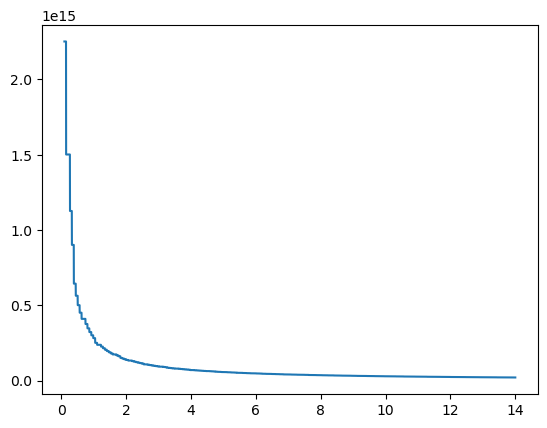

In [3]:
#First we define the solution parameters from the book:

g_na = 0.01 # mS/cm^2
g_k = 0.367 # mS/cm^2
q = 1.6 * 10**(-19) # Unit charge, coloumbs
F = 9.649 * 10**(4) # Coulombs/ mole
R = 8.315 # Joules/ mole x Kelvin
T = 300.15 # Kelvin
Na_e = 0.437 # M
K_e = 0.020 # M

#Then we continue by defining each non-dimenionsal variable, in order to make the overlying function more precise. In two seperate code blocks

#First the variable P

def P(p, F, q, R, T, g_na):
    P = (p * F * q)/(R * T * g_na)

    return P

#Then the variable gamma

def gamma(g_na, g_k):
    gamma = g_na / g_k
    
    return gamma

#This is all that is used, therefore we now move to the alpha function. Here we are inputting the above functions so it looks a bit messy.

def alpha(Na_e, K_e, p, F, q, R, T, g_na, g_k):
    alpha = (Na_e * np.exp(-3 * P(p, F, q, R, T, g_na)) + K_e * np.exp(2 * P(p, F, q, R, T, g_na) * gamma(g_na, g_k))) / (Na_e + K_e)

    return alpha

#Now we can move to the equation of mu

def mu(Na_e, K_e, p, F, q, R, T, g_na, g_k):
    mu = 1 / (2 * (1 - alpha(Na_e, K_e, p, F, q, R, T, g_na, g_k)))

    return mu

#Note that this is the output of mu, not the genuine output of the cell volume. Therefore we could derive a second function for that.
#However, I can't seem to find general values for X or Cl_e, so we will leave it, and continue with mu.

#Below is the plot for the precise alpha function against mu.

p_values = np.linspace(0.1, 14, 100000)

mu_values = np.zeros((len(p_values), 1))

for i in range(len(p_values)):
    mu_values[i] = mu(Na_e, K_e, p_values[i], F, q, R, T, g_na, g_k)

plt.plot(p_values, mu_values)

#As you can see the plot doesn't resemble Sneyd's plot. This is due to the output of the non-dimensional variable P. Sneyd uses P as the pump rate instead.
#In doing this he avoid the affects of the value of q, which is large. So we can try his way. In a new section



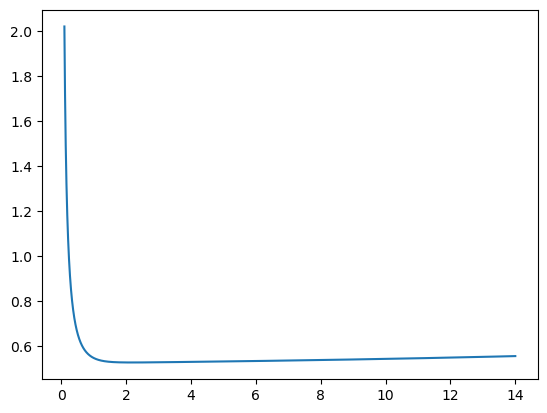

In [4]:
#Let us define a new alpha, a simpler one to avoid the type errors. Say Alpha2. Large P will now be noted as B.

def alpha2(B, Na_e, K_e, g_na, g_k):
    alpha2 = ((Na_e * np.exp(-3 * B)) + (K_e * np.exp(2 * B * gamma(g_na, g_k)))) / (Na_e + K_e)

    return alpha2

#mu2 uses the simple function of alpha, alpha2
def mu2(B, Na_e, K_e, g_na, g_k):
    mu2 = 1/ (2 * (1 - alpha2(B, Na_e, K_e, g_na, g_k)))

    return mu2

#Now I will run the simple alpha function against mu. As we can see it's very similar to the precise model.

B_values = np.linspace(0.1, 15, 100000)

mu2_values = np.zeros((len(B_values), 1))

for i in range(len(B_values)):
    mu2_values[i] = mu2(B_values[i], Na_e, K_e, g_na, g_k)

plt.plot(p_values, mu2_values)

#However, once again this doesn't resemble Sneyd's plot. Let us make another reduction to the accuracy of the relationship. By changing gamma to 0.11

Text(0, 0.5, 'Cell volume (approx. mu)')

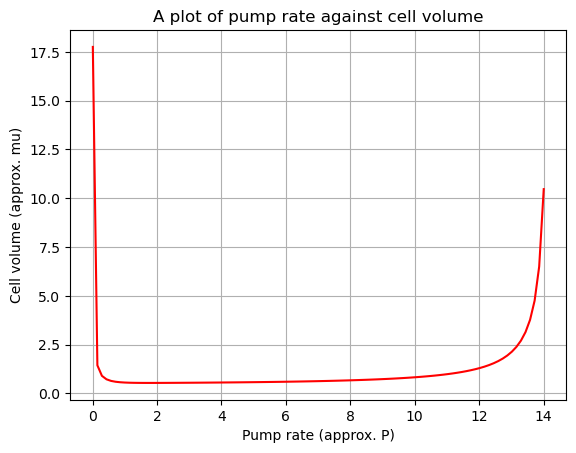

In [5]:
#Let us use gamma as a constant instead of another function. We will do this with the simple alpha model as well; named alpha3.

gamma2 = 0.11

def alpha3(B, Na_e, K_e):
    alpha3 = (Na_e * np.exp(-3 * B) + K_e * np.exp(2 * B * gamma2)) / (Na_e + K_e)

    return alpha3

#Then we define the new mu function with the estimations of pump rate as represented by B and by Gamma represented as 0.11,

def mu3(B, Na_e, K_e):
    mu3 = (2 * (1 - alpha3(B, Na_e, K_e))) ** (-1)
    return mu3

#Now we will run alpha3 through mu3 against pump rate.

B_values = np.linspace(0.01, 14, 100)
mu3_values = np.zeros((len(B_values), 1))

for i in range(len(B_values)):
    mu3_values[i] = mu3(B_values[i], Na_e, K_e)

plt.plot(B_values, mu3_values, color='red')
plt.grid(True)
plt.title("A plot of pump rate against cell volume")
plt.xlabel("Pump rate (approx. P)")
plt.ylabel("Cell volume (approx. mu)")

#Which looks like what we wanted.

#In conclusion then, we can see that gamma has a large effect on the end behaviour of the relationship between cell volume and pump rate.
#This is important as assumptions about gamma can therefore have large effects on the conclusions that the model implies.
#This also hints that our further refinement of Mariia's model using the actual values of conductance, could have a decent impact.



(-100.0, 100.0)

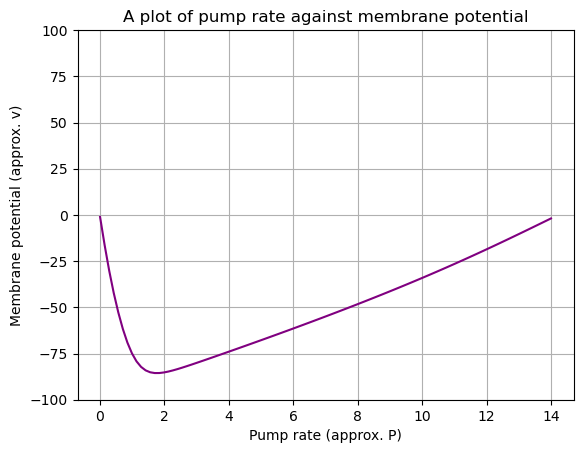

In [9]:
#Now we move to the plot for pump rate against cell membrane potential. Since we used simplifications for pump rate and cell volume, and gamma.
#It seems to make sense that using the same simplifications is the most likely to emit a model like Sneyd's. So that's what we will do.

#First we define V, we will do this by defining the non-dimensional variable v, and then applying constants to return it to the straight value of membrane potential V.

def v(Z_x, B, Na_e, K_e):
    Z_x = -1 # Valence

    v = -1 * np.log((-1 * Z_x + np.sqrt((Z_x ** (2)) + 4 * alpha3(B, Na_e, K_e) * (mu3(B, Na_e, K_e) ** (2))))/(2 * alpha3(B, Na_e, K_e) * mu3(B, Na_e, K_e)))

    return v

#Here is the true value of the membrane potential. With a multiplication of 1000 to equate it to mV.

def V(Z_x, B, Na_e, K_e, R, T, F):
    F = 9.649 * 10**(4) # Coulombs/ mole
    R = 8.315 # Joules/ mole x Kelvin
    T = 300.15 # Kelvin

    V = v(Z_x, B, Na_e, K_e) * ((R * T) / (F)) * 1000

    return V

#Note we could have used the same function for both and did it one step, but I wanted to make it clear, and allow myself to use either function easily without having to re-write.

#Then we design the same method for plotting.

#Re-defining valence to avoid errors of undefined.

Z_x = -1

B_values = np.linspace(0.01, 14, 100)
V_values = np.zeros((len(B_values), 1))

for i in range(len(B_values)):
    V_values[i] = V(Z_x, B_values[i], Na_e, K_e, R, T, F)

plt.plot(B_values, V_values, color='purple')
plt.grid(True)
plt.title("A plot of pump rate against membrane potential")
plt.xlabel("Pump rate (approx. P)")
plt.ylabel("Membrane potential (mV)")
plt.ylim(-100, 100)
